# Clustering

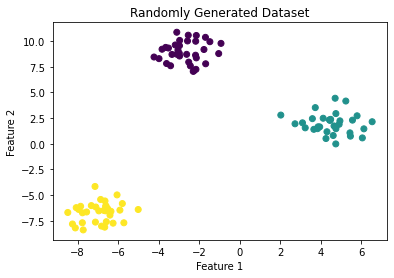

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate random data using scikit-learn's make_blobs function
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

# Plot the generated data using Matplotlib
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Randomly Generated Dataset')
plt.show()

## K-Means

- Note that the number of clusters *k* that the algorithm must find has to be specified beforehand.

In [2]:
from sklearn.cluster import KMeans

k = 3

kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(X)

In [3]:
# Predicted cluster labels of all features X
y_pred

array([0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2,
       2, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1, 2, 0, 2, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2])

In [4]:
# Let's look at the cluster centroids that the algo found:
kmeans.cluster_centers_

array([[-6.95170962, -6.67621669],
       [ 4.49951001,  1.93892013],
       [-2.66780392,  8.93576069]])

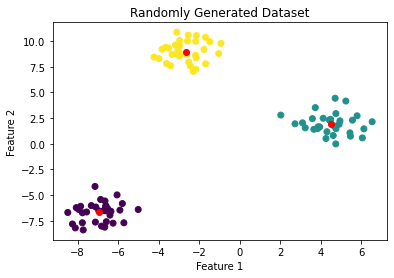

In [5]:
# Let's display the cluster centers on the graph:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c="r") # Cluster centers are marked red
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Randomly Generated Dataset')
plt.show()

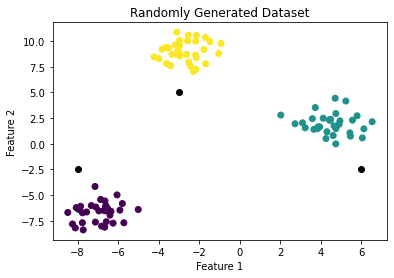

In [6]:
# Create a new set of values and let the KMeans clustering algo sort them out:
X_new = np.array([[-8, -2.5],[-3, 5], [6, -2.5]])

# Display the new set of values with the old cluster points:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(X_new[:,0],X_new[:,1], c="k") # New instances are marked black
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Randomly Generated Dataset')
plt.show()

In [7]:
# Let's predict to what cluster they belong to:
y_new = kmeans.predict(X_new)

print(y_new)

[0 2 1]


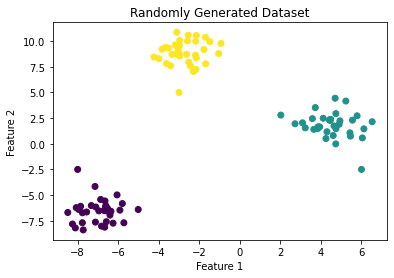

In [8]:
# Let's display the new values with appropriate cluster colors:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(X_new[:,0],X_new[:,1], c=y_new) # New instances are marked with appropriate cluster color determined in y_new
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Randomly Generated Dataset')
plt.show()

Centroid initialization method performance measure is called: **inertia**

## Inertia

- Inertia is the mean square distance between each instance and its closest centroid
- the KMeans class runs the algorithm *n_init* times and keeps the model with the lowest inertia
- *n_init* is set to 10 by default

In [9]:
kmeans.inertia_

171.91098459057724

## K-Means ++

- by default the K-Means algo from Scikit learn uses this centroid initialization method developed in 2006
- this method uses probability distribution that ensures that instances farther away from already chosen centroid are much more likely be selected as centroids
- if you want to pick instances randomly as original K-Means algo, set the *init* hyperparameter to "random"

The idea behind this initialization process is that by selecting the next centroid with a probability proportional to the distance from the nearest centroid, we are more likely to select centroids that are far away from each other. This can help to prevent the formation of clusters that are too similar or too spread out, which can be a common problem with random initialization.

## Choosing the number of clusters

- 